In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from scipy.stats import boxcox
from sklearn import preprocessing
import scipy

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)
#plotly
import plotly.plotly as py
from plotly.graph_objs import *
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.figure_factory as ff
from  plotly  import __version__
#plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)
from scipy import stats

3.1.0


In [40]:
# Acquire, load, and preview the data.
data1 = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
df_log = data1.applymap(lambda x: np.log(x+1))

#data_scaled = preprocessing.scale(data)
display(data1.head())
#df_transform = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data1['Sales'].values.reshape(-1, 1)
X = data1[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


In [3]:
#X = np.matrix(data1.iloc[:,1:5])

In [41]:
#boxcox(X[:,2])

In [43]:
#X

In [44]:
#X[X == 0] = .001

In [22]:
#boxcox(X[:,1])

In [8]:
data1.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [45]:
data1.Radio[data1.Radio == 0] =.001

In [46]:
data1[data1.Radio == 0]

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [24]:
df_log = data1.applymap(lambda x: np.log(x+1))

In [47]:
#np.array(data1.TV)

Text(0.5,1,'Probplot after Box-Cox transformation')

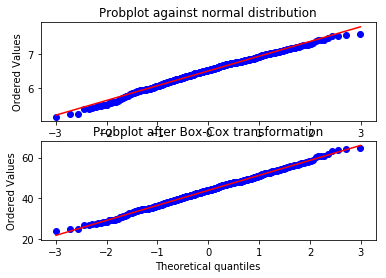

In [48]:
from scipy import stats 
import matplotlib.pyplot as plt
fig = plt.figure() 
ax1 = fig.add_subplot(211) 
x = stats.loggamma.rvs(5, size=500) + 5 
stats.probplot(x, dist=stats.norm, plot=ax1) 
ax1.set_xlabel('') 
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212) 
xt, _ = stats.boxcox(x) 
stats.probplot(xt, dist=stats.norm, plot=ax2) 
ax2.set_title('Probplot after Box-Cox transformation')

In [11]:
type(x[1])

numpy.float64

In [49]:
xi = df_log.TV
#xi = data1.TV
y = df_log.Sales

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

# Creating the dataset, and generating the plot
trace1 = go.Scatter(
                  x=xi,
                  y=y,
                  text = df_log.TV,
                  mode='markers',
                  marker=go.Marker(color='rgb(255, 127, 14)'),
                  name='Data'
                  )

trace2 = go.Scatter(
                  x=xi,
                  y=line,
                  mode='lines',
                  marker=go.Marker(color='rgb(31, 119, 180)'),
                  name='Fit'
                  )

annotation = go.Annotation(
                  x=10,
                  y=80000,
                  text='$R^2 = 0.9551,\\Y = 0.716X + 19.18$',
                  showarrow=False,
                  font=go.Font(size=16)
                  )
data = [trace1, trace2]

layout = go.Layout(
    title='Sales via TV',
    xaxis=dict(
        title='TV',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Sales',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)


fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Linear-Fit-in-python')
print('Slope:')
print(slope)
print('' )
print(slope * 10000)

/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:426: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:318: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.


/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:144: DeprecationWarning:

plotly.graph_objs.Annotation is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation




Slope:
0.3319590513533544

3319.5905135335443


In [13]:
type(xi[1])

numpy.float64

In [50]:
#data_transform = boxcox(data1)
xi = df_log.Radio
y = df_log.Sales

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

# Creating the dataset, and generating the plot
trace1 = go.Scatter(
                  x=xi,
                  y=y,
                  text = data1.Radio,
                  mode='markers',
                  marker=go.Marker(color='rgb(255, 127, 14)'),
                  name='Data'
                  )

trace2 = go.Scatter(
                  x=xi,
                  y=line,
                  mode='lines',
                  marker=go.Marker(color='rgb(31, 119, 180)'),
                  name='Fit'
                  )

annotation = go.Annotation(
                  x=10,# Does this stay constant?
                  y=80000,#Does this stay constant?
                  text='$R^2 = 0.9551,\\Y = 0.716X + 19.18$',
                  showarrow=False,
                  font=go.Font(size=16)
                  )
data = [trace1, trace2]

layout = go.Layout(
    title='Sales via Radio',
    xaxis=dict(
        title='TV',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Sales',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)


fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Linear-Fit-in-python')
print('Slope:')
print(slope)
print('' )
print(slope * 10000)

/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:426: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:318: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.


/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:144: DeprecationWarning:

plotly.graph_objs.Annotation is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation




Slope:
0.19686541227278903

1968.6541227278904


In [26]:
#data_transform = boxcox(data1)
xi = df_log.Newspaper
y = df_log.Sales

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

# Creating the dataset, and generating the plot
trace1 = go.Scatter(
                  x=xi,
                  y=y,
                  text = data1.Newspaper,
                  mode='markers',
                  marker=go.Marker(color='rgb(255, 127, 14)'),
                  name='Data'
                  )

trace2 = go.Scatter(
                  x=xi,
                  y=line,
                  mode='lines',
                  marker=go.Marker(color='rgb(31, 119, 180)'),
                  name='Fit'
                  )

annotation = go.Annotation(
                  x=10,# Does this stay constant?
                  y=80000,#Does this stay constant?
                  text='$R^2 = 0.9551,\\Y = 0.716X + 19.18$',
                  showarrow=False,
                  font=go.Font(size=16)
                  )
data = [trace1, trace2]

layout = go.Layout(
    title='Sales via Newspaper',
    xaxis=dict(
        title='TV',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Sales',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)


fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Linear-Fit-in-python')
print('Slope:')
print(slope)
print('' )
print(slope * 10000)

/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:426: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:318: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.


/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:144: DeprecationWarning:

plotly.graph_objs.Annotation is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation




Slope:
0.07257804020991161

725.7804020991161


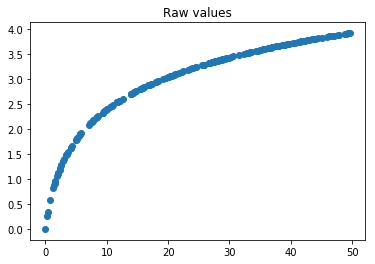

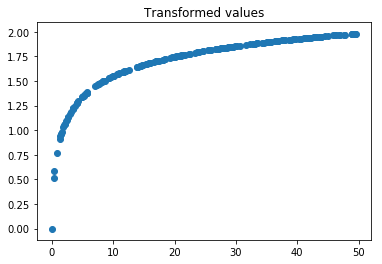

In [52]:
# Sample data.
outcome = data1.Radio
feature = df_log.Radio

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

In [54]:
# Extract predicted values.
predicted = regr.predict(df_log.Sales).ravel()
actual = df_log['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted
#residual_transform = boxcox(residual)
#skness = skew(residual)

# This looks a bit concerning.
#plt.hist(skness)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[3.13983262 2.43361336 2.3321439  2.97041447 2.63188884 2.10413415
 2.54944517 2.65324196 1.75785792 2.4510051  2.2617631  2.91235066
 2.32238772 2.37024374 2.99573227 3.15273602 2.60268969 3.23474917
 2.50959926 2.74727091 2.94443898 2.60268969 1.88706965 2.80336038
 2.37024374 2.56494936 2.77258872 2.82731362 2.99071973 2.44234704
 3.10906096 2.55722731 2.360854   2.91235066 2.35137526 2.62466859
 3.27336401 2.75366071 2.40694511 3.11351531 2.8678989  2.89591194
 3.07731226 2.63188884 2.2512918  2.76631911 2.4510051  3.18635263
 2.76000994 2.37024374 2.51769647 2.45958884 3.16124671 3.10009229
 3.05400118 3.20680324 1.87180218 2.65324196 3.21084365 2.96527307
 2.20827441 3.22684399 2.81540872 2.7080502  2.94443898 2.3321439
 2.35137526 2.66722821 2.99071973 3.14845336 2.9601051  2.59525471
 2.28238239 2.48490665 2.89037176 2.27212589 2.06686276 2.72129543
 1.84054963 2.48490665 2.54944517 2.58776404 2.50959926 2.68102153
 3.12236492 2.78501124 2.56494936 2.83321334 2.63188884 2.87356464
 2.50143595 2.11625551 3.0155349  3.14415228 2.52572864 2.88480071
 2.54160199 2.80336038 3.27336401 2.90142159 2.54160199 3.21084365
 2.76000994 2.75366071 3.07731226 3.0056826  2.10413415 2.27212589
 1.84054963 3.03495299 2.66722821 3.12676054 2.71469474 2.82731362
 2.74727091 2.61006979 2.58021683 2.34180581 2.82731362 2.02814825
 2.80336038 2.07944154 2.53369681 2.78501124 3.0301337  2.4510051
 2.02814825 2.28238239 3.24649099 2.37024374 0.95551145 2.61739583
 1.90210753 3.02529108 2.46809953 2.53369681 2.35137526 3.08190997
 2.360854   3.07731226 2.4765384  3.0056826  3.04927304 2.43361336
 2.51769647 2.42480273 2.65324196 3.27336401 2.4765384  2.40694511
 2.83907846 2.53369681 2.8678989  2.99573227 2.8094027  1.43508453
 2.79116511 2.40694511 2.11625551 2.63188884 2.73436751 2.66025954
 2.76631911 2.94443898 2.55722731 2.55722731 2.19722458 2.58021683
 2.89591194 2.77258872 2.24070969 2.74084002 2.1517622  2.54160199
 2.52572864 3.33220451 3.05400118 2.54160199 2.54944517 2.61006979
 2.44234704 2.58021683 2.27212589 3.30321697 2.92316158 3.16124671
 2.42480273 2.90690106 2.82731362 2.04122033 2.46809953 2.38876279
 1.93152141 3.02529108 2.90690106 2.1517622  2.37024374 2.62466859
 3.27714473 2.66722821].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [29]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

NameError: name 'predicted' is not defined

In [37]:
correlation_matrix = df_log.corr()
display(correlation_matrix)

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000,0.041,-0.105,-0.130,-0.023
TV,0.041,1.000,0.019,0.050,0.852
Radio,-0.105,0.019,1.000,0.209,0.475
Newspaper,-0.130,0.050,0.209,1.000,0.168
Sales,-0.023,0.852,0.475,0.168,1.000


In [36]:
df_log

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,0.693,5.443,3.658,4.251,3.140
1,1.099,3.818,3.696,3.831,2.434
2,1.386,2.901,3.848,4.253,2.332
3,1.609,5.027,3.745,4.086,2.970
4,1.792,5.203,2.468,4.084,2.632
5,1.946,2.272,3.910,4.331,2.104
6,2.079,4.069,3.520,3.199,2.549
7,2.197,4.797,3.025,2.534,2.653
8,2.303,2.262,1.131,0.693,1.758
9,2.398,5.302,1.281,3.100,2.451


In [39]:

x = residual
data = [go.Histogram(x=x)]

iplot(data, filename='basic histogram')

NameError: name 'residual' is not defined

In [20]:
residual

NameError: name 'residual' is not defined

In [21]:
scipy.stats.mstats.zscore(residual)

NameError: name 'residual' is not defined